## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2020-21 учебный год

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [373]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [374]:
# your code here
df = pd.read_csv('https://raw.githubusercontent.com/TyurinIvan/iad2021/master/hw3/german_credit.csv', index_col=None, header=0, sep=",")
#df = pd.read_csv('https://raw.githubusercontent.com/PersDep/data-mining-intro-2021/main/hw03-EDA-data/german_credit.csv', index_col=None, header=0, sep=",")


df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,>= 7 yrs,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,>= 7 yrs,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,1 <= ... < 4 yrs,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,>= 7 yrs,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,>= 7 yrs,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,< 1 yr,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,>= 7 yrs,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,< 1 yr,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [375]:
# your code here
print('Количество пропусков по столбцам')
print(pd.isnull(df).sum())

print()
print('Тип признака по столбцам')
print(df.dtypes)

Количество пропусков по столбцам
status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

Тип признака по столбцам
status                     object
duration                    int64
credit_history             object
purpose                    object
amount                      int64
savings                    object
employment_duration        object
installment_rate           object
personal_status_sex        object
other_debtors

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [376]:
# your code here
df.groupby(['purpose'])['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [377]:
# your code here
age30 = (df['age'] < 30).sum()
age30Housing = ((df['age'] < 30) & (df['housing'] == 'rent')).sum()
#print(age30, age30Housing)
print('% < 30: ', age30Housing/age30*100)


age40 = (df['age'] > 40).sum()
age40Housing = ((df['age'] > 40) & (df['housing'] == 'rent')).sum()
#print(age40, age40Housing)
print('% > 40: ', age40Housing/age40*100)

% < 30:  66.66666666666666
% > 40:  68.01470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [378]:
# your code here

df['number_credits'].unique()
question = ((df['foreign_worker'] == 'yes') & (df['number_credits'] == '4-5')).sum()
question +=((df['foreign_worker'] == 'yes') & (df['number_credits'] == '>= 6')).sum() 

print(question)

#df['number_credits'] == '2-3'

1


### Задание 6 (1 балл)

In [379]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

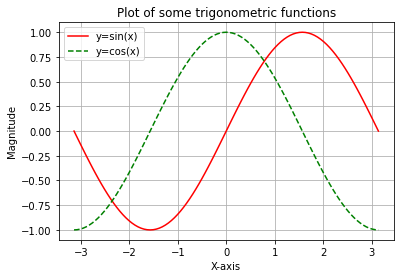

In [380]:
# your code here

# Plotting tutorials in Python
# Adding Multiple plots by superimposition
# Good for plots sharing similar x, y limits
# Using single plot command and legend

x = np.linspace(-1*np.pi, np.pi, 101)
y = np.sin(x)
z = np.cos(x)

plt.plot(x, y, 'r', x, z, '--g') # r, g - red, green colour
plt.xlabel("X-axis")
plt.ylabel("Magnitude")
plt.title("Plot of some trigonometric functions")

plt.legend(['y=sin(x)', 'y=cos(x)'])
plt.grid()

plt.show()
 

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

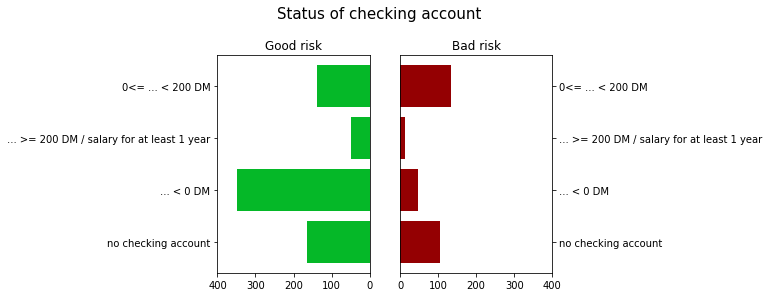

In [381]:
# your code here
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
 

y = df['status'].unique()
x1 = df[df['credit_risk'] == 'good'].groupby(['status'])['status'].count().values
x2 = df[df['credit_risk'] ==  'bad'].groupby(['status'])['status'].count().values
#print(x1, x2)
ax1.barh(y, x1, color='#05b828')
ax2.barh(y, x2, color='#940002')


fig.suptitle('Status of checking account',
             y = 1.05,
             fontsize = 15)
ax1.set_title('Good risk')
ax2.set_title('Bad risk')

xlim = (0, 400)
ylim = (0, 100)
ax1.set_xlim(xlim)
ax2.set_xlim(xlim)
ax1.invert_xaxis()
ax2.yaxis.tick_right()
plt.show()

### Задание 8  (0.5 балла)

In [382]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

In [383]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

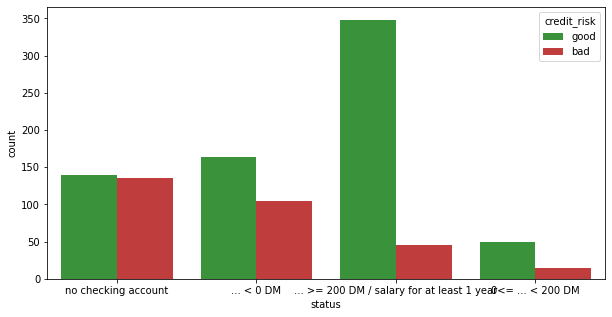

In [384]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["status"], hue=df["credit_risk"], palette=sns.color_palette()[2:])
#sns.countplot(x=df["status"], hue=df["credit_risk"], palette=['#432371',"#FAAE7B"]);

In [385]:
# your code here

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

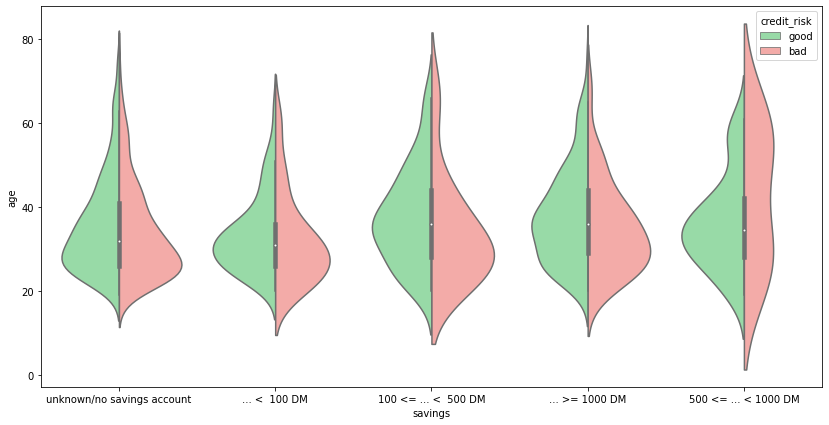

In [386]:
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, hue='credit_risk', x='savings', y='age', multiple='dodge', shrink= 0.5, split=True,
               palette=sns.color_palette('pastel')[2:])

In [387]:
# your code here

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

Text(0, 0.5, 'Count')

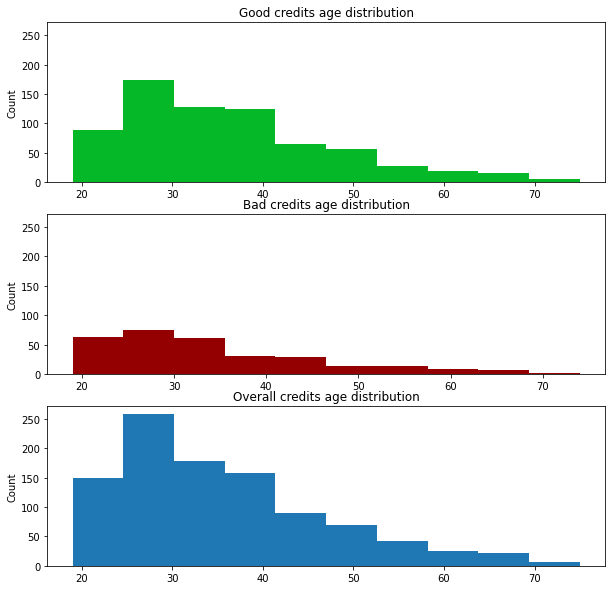

In [433]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=True, figsize=(10,10))
ax1.hist(df[df["credit_risk"] == "good"]['age'].array, color='#05b828')
ax1.set_title('Good credits age distribution')
ax1.set_ylabel("Count")

ax2.hist(df[df["credit_risk"] == "bad"]['age'].array, color='#940002')
ax2.set_title('Bad credits age distribution')
ax2.set_ylabel("Count")

ax3.hist(df['age'].array)
ax3.set_title('Overall credits age distribution')
ax3.set_ylabel("Count")

In [324]:
# your code here

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

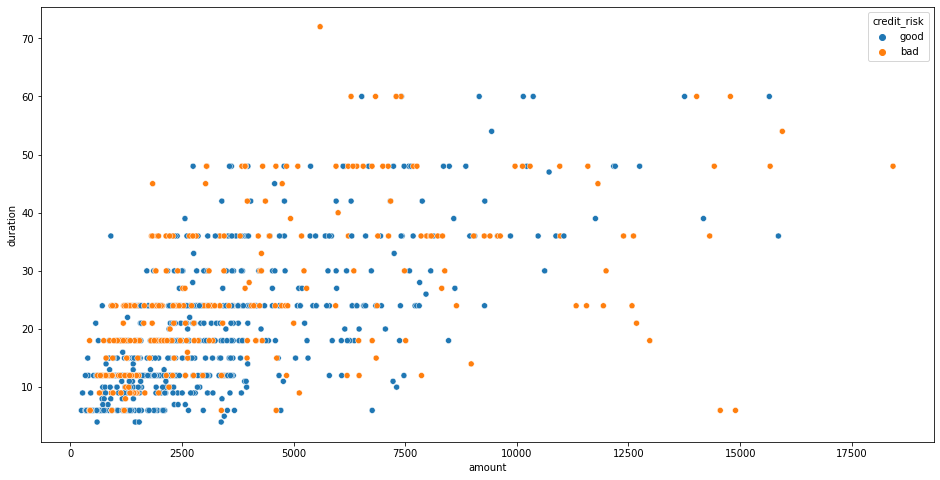

In [325]:
plt.figure(figsize=(16, 8))
sns.scatterplot(data=df, x="amount", y="duration", hue="credit_risk")

In [326]:
# your code here

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

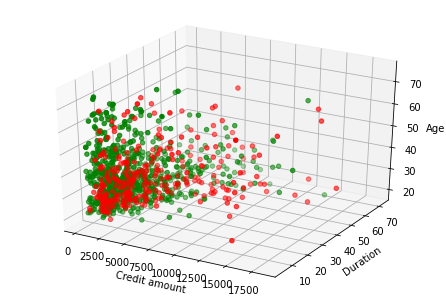

In [327]:
#sns.scatter(data=df, x="amount", y="duration", z="age", hue="credit_risk")
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

x_g = df[df['credit_risk'] == 'good']['amount']
y_g = df[df['credit_risk'] == 'good']['duration']
z_g = df[df['credit_risk'] == 'good']['age']

x_b = df[df['credit_risk'] == 'bad']['amount']
y_b = df[df['credit_risk'] == 'bad']['duration']
z_b = df[df['credit_risk'] == 'bad']['age']


ax.scatter(x_g, y_g, z_g, c='green', marker='o')
ax.scatter(x_b, y_b, z_b, c='red', marker='o')
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.show()

In [328]:
# your code here

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [367]:
for column in list(df):
  if df[column].dtype == 'object':
    new_column = 'my_' + str(column)
    df[new_column] = label.fit_transform(df[column])

    # Я так и не понял, что нужно... так что действие по желанию!
    df.drop(column, axis = 1, inplace = True)

In [368]:
df

,duration,amount,age,my_employment_duration,my_status,my_savings,my_credit_history,my_purpose,my_installment_rate,my_personal_status_sex,my_other_debtors,my_present_residence,my_property,my_other_installment_plans,my_housing,my_number_credits,my_job,my_people_liable,my_telephone,my_foreign_worker,my_credit_risk
0,18,1049,21,2,3,4,0,2,2,0,2,3,1,1,0,0,1,0,0,0,1
1,9,2799,36,0,3,4,0,5,1,3,2,0,3,1,0,1,1,1,0,0,1
2,12,841,23,1,0,0,4,8,1,0,2,3,3,1,0,0,3,0,0,0,1
3,12,2122,39,0,3,4,0,5,0,3,2,0,3,1,0,1,3,1,0,1,1
4,12,2171,38,0,3,4,0,5,2,3,2,3,1,0,2,1,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,24,1987,21,0,3,4,4,4,1,3,2,3,3,1,0,0,3,1,0,0,0
996,24,2303,45,3,3,4,4,5,2,3,0,2,3,1,2,0,1,0,0,0,0
997,21,12680,30,3,1,1,0,5,2,3,2,3,2,1,1,0,0,0,1,0,0
998,12,6468,52,4,0,1,4,4,1,3,2,2,2,1,2,0,0,0,1,0,0


In [ ]:
# your code here


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
    # your code here

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = data.drop('credit_risk', 1).values
y = data['credit_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)
# Используйте X_train и y_train на ваше усмотрение
# your code here
accuracy_score(y_test, predict(X_test))